# Scarpping Data 

# Scrapping Data ulasan Netflix Bahasa Indonesia

In [3]:
import pandas as pd
from google_play_scraper import reviews, Sort

print("Memulai proses scraping ulasan aplikasi Netflix...")

# Tentukan ID aplikasi Netflix di Google Play Store
app_id = 'com.netflix.mediaclient'

# Lakukan scraping dengan batasan 1000 data
# Kita akan mengambil ulasan terbaru (Sort.NEWEST)
# Bahasa diatur ke Indonesia (lang='id') dan negara (country='id')
result, continuation_token = reviews(
    app_id,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=1000,
    filter_score_with=None # Mengambil semua rating bintang
)

# Jika tidak ada ulasan yang ditemukan, hentikan proses
if not result:
    print("Tidak ada ulasan yang ditemukan atau terjadi kesalahan.")
else:
    # Ubah hasil scraping (yang dalam bentuk list of dictionary) menjadi DataFrame pandas
    df_reviews = pd.DataFrame(result)

    # Menampilkan beberapa baris pertama dari data untuk verifikasi
    print("\nData berhasil di-scrape. Berikut adalah 5 baris pertama:")
    print(df_reviews.head())

    # Menentukan nama file output
    output_filename = 'netflix_playstore_reviews.csv'

    # Menyimpan DataFrame ke dalam file CSV
    # encoding='utf-8-sig' digunakan agar karakter non-latin (seperti emoji) bisa terbaca dengan baik di Excel
    # index=False agar nomor index dari DataFrame tidak ikut ditulis ke dalam file CSV
    df_reviews.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\nProses selesai! Data telah disimpan dalam file bernama '{output_filename}'")
    print(f"Total ulasan yang berhasil diambil: {len(df_reviews)} data.")

Memulai proses scraping ulasan aplikasi Netflix...

Data berhasil di-scrape. Berikut adalah 5 baris pertama:
                               reviewId               userName  \
0  0172d1b3-fe1f-4b04-93dc-4fb8e2a6b69d              campur an   
1  8520d397-cc11-4cc2-b9d7-27d19b612859  Siti Fakhirah Qorrian   
2  d2d8a179-3a71-469a-9881-f54ab2a6c959          Agus Marwanto   
3  82f284a6-cf21-450c-be3d-040b11537783            Amir Silaen   
4  3ebc1c95-9ba5-4490-8a91-0965e4d307ce             Nurkafi 99   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  masa baru daftar akun langsung di suruh bayar ...      1              0   
1

# Scrapping Data Ulasan Netflix bahasa inggris

In [2]:
import pandas as pd
from google_play_scraper import reviews, Sort

print("Starting the process of scraping Netflix app reviews for the USA...")

# Define the Netflix app ID on the Google Play Store
app_id = 'com.netflix.mediaclient'

# Scrape with a limit of 1000 reviews
# We will get the newest reviews (Sort.NEWEST)
# Language is set to English (lang='en') and country to the USA (country='us')
result, continuation_token = reviews(
    app_id,
    lang='en',
    country='us',
    sort=Sort.NEWEST,
    count=1000,
    filter_score_with=None # Get all star ratings
)

# If no reviews are found, stop the process
if not result:
    print("No reviews were found or an error occurred.")
else:
    # Convert the scraping result (a list of dictionaries) into a pandas DataFrame
    df_reviews = pd.DataFrame(result)

    # Display the first few rows of the data for verification
    print("\nData successfully scraped. Here are the first 5 rows:")
    print(df_reviews.head())

    # Define the output filename
    output_filename = 'netflix_playstore_reviews_usa.csv'

    # Save the DataFrame to a CSV file
    # encoding='utf-8-sig' is used so that non-Latin characters (like emojis) can be read correctly in Excel
    # index=False prevents writing the DataFrame index numbers into the CSV file
    df_reviews.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\nProcess complete! Data has been saved in the file named '{output_filename}'")
    print(f"Total reviews successfully retrieved: {len(df_reviews)}.")

Starting the process of scraping Netflix app reviews for the USA...

Data successfully scraped. Here are the first 5 rows:
                               reviewId           userName  \
0  4d699aeb-ab66-4c0f-92d8-45590ef0e259          Suien Kzo   
1  cb239fb1-acd0-4753-8e27-32a0a761b9aa                  1   
2  bb3e31ec-b004-4697-800d-6f3bea38e04a       Mazhar Islam   
3  bd11ac82-98b2-41dc-9c00-c7fcab49b4f3       Nengjahat Hk   
4  a196f6c1-fc93-4c8b-af94-34278f9fedd8  Palak Vishwakarma   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  i feel like it's not even worth to subscribe a...      2              0   
1  adflix i

# Prepocessing


 # Prepocessing Data Ulasan Netflix Bahasa Indonesia

In [4]:
import pandas as pd
import re

# --- 1. Memuat Data ---
try:
    df = pd.read_csv('netflix_playstore_reviews.csv')
    print("File CSV berhasil dimuat.")
except FileNotFoundError:
    print("File 'netflix_playstore_reviews.csv' tidak ditemukan. Pastikan Anda sudah menjalankan skrip scraping dari Langkah 1.")
    exit()

# --- 2. Fungsi untuk Text Processing ---
stopwords_indonesia = set([
    'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir',
    'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara',
    'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan',
    'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah',
    'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik',
    'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu',
    'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar',
    'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah',
    'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya',
    'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu',
    'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama',
    'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar',
    'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh',
    'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya', 'bulan', 'bung', 'cara',
    'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada',
    'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya',
    'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat',
    'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab',
    'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya',
    'dikerjakan', 'dikirim', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya',
    'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan',
    'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya',
    'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya',
    'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan',
    'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'dituntaskan', 'diturunkan', 'diturunkan', 'dituturkan',
    'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya',
    'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah',
    'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratnya', 'ibu', 'ikut',
    'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah',
    'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan', 'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya',
    'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala',
    'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah',
    'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan',
    'kecil', 'kedua', 'keduanya', 'keinginan', 'kelak', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan',
    'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan',
    'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'lagi',
    'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima',
    'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi',
    'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan',
    'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat',
    'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan',
    'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan',
    'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti', 'menantikan', 'menanya', 'menanyai',
    'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri',
    'mengapa', 'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki',
    'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira', 'mengirim',
    'mengirimkan', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju',
    'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut',
    'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski',
    'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai',
    'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya',
    'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah',
    'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama',
    'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya',
    'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai',
    'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'sangkut', 'satu', 'saya', 'sayalah', 'se', 'sebab',
    'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya',
    'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya',
    'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian',
    'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak',
    'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus',
    'sekalipun', 'sekarang', 'sekaranglah', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sela', 'selain',
    'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam',
    'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal',
    'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah',
    'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepeserpun',
    'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu',
    'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya',
    'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini',
    'sinilah', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tanpa',
    'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu',
    'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap',
    'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih',
    'terlihat', 'termasuk', 'ternyata', 'terpaksa', 'terserah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap',
    'tetapi', 'tiap', 'tidak', 'tidakkah', 'tidaklah', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya',
    'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'wah', 'wahai',
    'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang'
])

def process_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords_indonesia]
    processed_text = ' '.join(tokens)
    
    return processed_text

# --- 3. Menerapkan Fungsi ke Kolom 'content' ---
if 'content' in df.columns:
    print("\nMemulai proses text processing pada kolom 'content'...")
    df['processed_content'] = df['content'].apply(process_text)

    print("\nProses selesai. Berikut adalah perbandingan data asli dan hasil processing:")
    print(df[['content', 'processed_content']].head())

    # --- 4. Menyimpan Hasil ke CSV Baru ---
    output_filename = 'netflix_playstore_reviews_processed.csv'
    df.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\nData yang sudah diproses telah disimpan dalam file '{output_filename}'")
else:
    print("\nKolom 'content' tidak ditemukan dalam file CSV.")

File CSV berhasil dimuat.

Memulai proses text processing pada kolom 'content'...

Proses selesai. Berikut adalah perbandingan data asli dan hasil processing:
                                             content  \
0              menyajikan konten seksual untuk anak2   
1  ini pertama kali ikut boikot aplikasi karna fi...   
2                                                 ok   
3           aplikasi bodoh memaksa upgrade, ga jelas   
4                                                 oc   

                                   processed_content  
0                    menyajikan konten seksual anak2  
1  kali boikot aplikasi karna film yg menghina kr...  
2                                                 ok  
3                  aplikasi bodoh memaksa upgrade ga  
4                                                 oc  

Data yang sudah diproses telah disimpan dalam file 'netflix_playstore_reviews_processed.csv'


# Prepocessing Data Ulasan Netflix Bahasa Inggris 

In [4]:
import pandas as pd
import re

# --- 1. Load Data ---
try:
    # Load the CSV file containing the USA reviews
    df = pd.read_csv('netflix_playstore_reviews_usa.csv')
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print("File 'netflix_playstore_reviews_usa.csv' not found. Please ensure you have run the scraping script for the USA.")
    exit()

# --- 2. Text Processing Function ---

# A set of common English stopwords
stopwords_english = set([
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
    'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', "can't", 'cannot',
    'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few',
    'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll",
    "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll",
    "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most',
    "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our',
    'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should',
    "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves',
    'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those',
    'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll", "we're",
    "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 'who',
    "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't", 'you', "you'd", "you'll", "you're",
    "you've", 'your', 'yours', 'yourself', 'yourselves'
])

def process_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text (split into words)
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords_english]
    # Join the words back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

# --- 3. Apply the Function to the 'content' Column ---
if 'content' in df.columns:
    print("\nStarting text processing on the 'content' column...")
    df['processed_content'] = df['content'].apply(process_text)

    print("\nProcess complete. Here is a comparison of the original and processed data:")
    print(df[['content', 'processed_content']].head())

    # --- 4. Save the Results to a New CSV ---
    output_filename = 'netflix_playstore_reviews_usa_processed.csv'
    df.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\nThe processed data has been saved to '{output_filename}'")
else:
    print("\nThe 'content' column was not found in the CSV file.")

CSV file loaded successfully.

Starting text processing on the 'content' column...

Process complete. Here is a comparison of the original and processed data:
                                             content  \
0  i feel like it's not even worth to subscribe a...   
1  adflix i love watching ads its my favourite pa...   
2                   One And only Premium Ott channel   
3                                               best   
4                                              a la.   

                                   processed_content  
0  feel like even worth subscribe anymore worth h...  
1        adflix love watching ads favourite part day  
2                            one premium ott channel  
3                                               best  
4                                                 la  

The processed data has been saved to 'netflix_playstore_reviews_usa_processed.csv'


# Normalisasi Kata

# Normalisasi Kata Ulasan Netflix Bahasa Indoensia

In [6]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import time

# --- 1. Memuat Data Hasil Text Processing ---
try:
    # Memuat file dari langkah pembersihan sebelumnya
    df = pd.read_csv('netflix_playstore_reviews_processed.csv')
    print("✅ File 'netflix_playstore_reviews_processed.csv' berhasil dimuat.")
except FileNotFoundError:
    print("❌ File 'netflix_playstore_reviews_processed.csv' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan skrip text processing sebelumnya.")
    exit()

# --- 2. Inisialisasi Stemmer Bahasa Indonesia ---
# Cukup dilakukan sekali di awal untuk membangun kamus kata dasar
print("\n⚙️  Mempersiapkan stemmer Sastrawi...")
factory = StemmerFactory()
stemmer = factory.create_stemmer()
print("👍 Stemmer siap digunakan.")

# --- 3. Fungsi untuk Melakukan Stemming Teks ---
def normalize_indonesian(text):
    """
    Fungsi untuk mengubah setiap kata dalam sebuah kalimat (string)
    ke bentuk kata dasarnya menggunakan Sastrawi.
    """
    # Pastikan input adalah string untuk menghindari error
    if not isinstance(text, str):
        return ""
    
    # Proses stemming dari library Sastrawi
    stemmed_text = stemmer.stem(text)
    return stemmed_text

# --- 4. Menerapkan Normalisasi ke Kolom Ulasan ---
# Cek apakah kolom 'processed_content' ada di dalam data
if 'processed_content' in df.columns:
    print("\n🚀 Memulai proses normalisasi (stemming)...")
    print("Mohon tunggu, proses ini mungkin memakan waktu beberapa menit tergantung jumlah data.")
    
    # Mengukur waktu yang dibutuhkan untuk proses
    start_time = time.time()
    
    # Terapkan fungsi 'normalize_indonesian' ke setiap baris pada kolom 'processed_content'
    # Hasilnya akan disimpan di kolom baru bernama 'normalized_content'
    df['normalized_content'] = df['processed_content'].apply(normalize_indonesian)
    
    end_time = time.time()
    print(f"✅ Proses stemming selesai dalam {end_time - start_time:.2f} detik.")

    print("\nBerikut adalah perbandingan data sebelum dan sesudah normalisasi:")
    # Menampilkan kolom yang relevan untuk perbandingan
    print(df[['processed_content', 'normalized_content']].head())

    # --- 5. Menyimpan Hasil ke File CSV Baru ---
    output_filename = 'netflix_playstore_reviews_normalized.csv'
    
    # Menyimpan DataFrame ke file CSV baru
    df.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\n✨ Data yang sudah dinormalisasi telah berhasil disimpan dalam file '{output_filename}'")
else:
    print("\n❌ Kolom 'processed_content' tidak ditemukan. Pastikan file input sudah benar.")

✅ File 'netflix_playstore_reviews_processed.csv' berhasil dimuat.

⚙️  Mempersiapkan stemmer Sastrawi...
👍 Stemmer siap digunakan.

🚀 Memulai proses normalisasi (stemming)...
Mohon tunggu, proses ini mungkin memakan waktu beberapa menit tergantung jumlah data.
✅ Proses stemming selesai dalam 120.14 detik.

Berikut adalah perbandingan data sebelum dan sesudah normalisasi:
                                   processed_content  \
0                    menyajikan konten seksual anak2   
1  kali boikot aplikasi karna film yg menghina kr...   
2                                                 ok   
3                  aplikasi bodoh memaksa upgrade ga   
4                                                 oc   

                                normalized_content  
0                        saji konten seksual anak2  
1  kali boikot aplikasi karna film yg hina kristen  
2                                               ok  
3                  aplikasi bodoh paksa upgrade ga  
4                       

# Normalisasi Kata Ulasan Netflix Bahasa Inggris

In [7]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import time

# --- 1. Memuat Data yang Sudah Diproses ---
try:
    # Memuat hasil dari skrip text processing bahasa Inggris
    df = pd.read_csv('netflix_playstore_reviews_usa_processed.csv')
    print("File 'netflix_playstore_reviews_usa_processed.csv' berhasil dimuat.")
except FileNotFoundError:
    print("File 'netflix_playstore_reviews_usa_processed.csv' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan skrip text processing untuk ulasan USA.")
    exit()

# --- 2. Inisialisasi Lemmatizer ---
lemmatizer = WordNetLemmatizer()

# --- 3. Fungsi untuk Lemmatization Teks ---
def lemmatize_text(text):
    """Fungsi untuk mengubah setiap kata dalam kalimat ke bentuk dasarnya (lemma)."""
    if not isinstance(text, str):
        return ""
    
    # 1. Tokenize: Memecah kalimat menjadi kata-kata
    tokens = word_tokenize(text)
    
    # 2. Lemmatize: Mengubah setiap kata ke bentuk dasarnya
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 3. Join: Menggabungkan kembali kata-kata menjadi kalimat
    return ' '.join(lemmatized_tokens)

# --- 4. Menerapkan Fungsi Lemmatization ke Kolom 'processed_content' ---
if 'processed_content' in df.columns:
    print("\nMemulai proses normalisasi (lemmatization) untuk teks bahasa Inggris...")
    print("Proses ini mungkin memerlukan sedikit waktu, harap tunggu.")
    
    # Mengukur waktu yang dibutuhkan
    start_time = time.time()
    
    # Menerapkan fungsi ke setiap baris dan membuat kolom baru 'normalized_content'
    df['normalized_content'] = df['processed_content'].apply(lemmatize_text)
    
    end_time = time.time()
    print(f"Proses lemmatization selesai dalam {end_time - start_time:.2f} detik.")

    print("\nBerikut adalah perbandingan data sebelum dan sesudah normalisasi:")
    # Menampilkan kolom yang relevan untuk perbandingan
    print(df[['processed_content', 'normalized_content']].head())

    # --- 5. Menyimpan Hasil ke File CSV Baru ---
    output_filename = 'netflix_playstore_reviews_usa_normalized.csv'
    df.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\nData yang sudah dinormalisasi telah disimpan dalam file '{output_filename}'")
else:
    print("\nKolom 'processed_content' tidak ditemukan. Pastikan file input sudah benar.")

File 'netflix_playstore_reviews_usa_processed.csv' berhasil dimuat.

Memulai proses normalisasi (lemmatization) untuk teks bahasa Inggris...
Proses ini mungkin memerlukan sedikit waktu, harap tunggu.
Proses lemmatization selesai dalam 0.09 detik.

Berikut adalah perbandingan data sebelum dan sesudah normalisasi:
                                   processed_content  \
0  feel like even worth subscribe anymore worth h...   
1        adflix love watching ads favourite part day   
2                            one premium ott channel   
3                                               best   
4                                                 la   

                                  normalized_content  
0  feel like even worth subscribe anymore worth h...  
1         adflix love watching ad favourite part day  
2                            one premium ott channel  
3                                               best  
4                                                 la  

Data yang sudah di

# Remove Duplikat Ulasan Netflix Bahasa Indonesia

In [9]:
import pandas as pd

# --- 1. Memuat Data Hasil Normalisasi ---
input_filename = 'netflix_playstore_reviews_normalized.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"✅ File '{input_filename}' berhasil dimuat.")
except FileNotFoundError:
    print(f"❌ File '{input_filename}' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan skrip normalisasi sebelumnya.")
    exit()

# --- 2. Menghapus Data Duplikat ---
print("\n🚀 Memulai proses penghapusan data duplikat...")

# Menampilkan jumlah baris data SEBELUM dihapus
initial_rows = len(df)
print(f"Jumlah ulasan awal: {initial_rows} data")

# Menghapus duplikat berdasarkan kolom 'content' (teks ulasan asli).
# 'keep='first'' berarti kita menyimpan kemunculan pertama dari ulasan duplikat.
df_deduplicated = df.drop_duplicates(subset=['content'], keep='first')

# Menampilkan jumlah baris data SETELAH dihapus
final_rows = len(df_deduplicated)
print(f"Jumlah ulasan setelah duplikat dihapus: {final_rows} data")

# Menghitung dan menampilkan jumlah data duplikat yang dibuang
num_duplicates_removed = initial_rows - final_rows
print(f"Jumlah ulasan duplikat yang berhasil dihapus: {num_duplicates_removed} data")

# --- 3. Menyimpan Hasil ke File CSV Baru ---
if num_duplicates_removed >= 0:
    output_filename = 'netflix_playstore_reviews_final.csv'
    
    # Menyimpan DataFrame yang sudah bersih ke file CSV baru
    df_deduplicated.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\n✨ Proses selesai! Data bersih telah disimpan dalam file '{output_filename}'")

✅ File 'netflix_playstore_reviews_normalized.csv' berhasil dimuat.

🚀 Memulai proses penghapusan data duplikat...
Jumlah ulasan awal: 1000 data
Jumlah ulasan setelah duplikat dihapus: 944 data
Jumlah ulasan duplikat yang berhasil dihapus: 56 data

✨ Proses selesai! Data bersih telah disimpan dalam file 'netflix_playstore_reviews_final.csv'


# Remove Duplikat Ulasan Netflix Bahasa Inggris

In [10]:
import pandas as pd

# --- 1. Memuat Data Hasil Normalisasi ---
input_filename = 'netflix_playstore_reviews_usa_normalized.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"✅ File '{input_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"❌ File '{input_filename}' not found.")
    print("Please make sure you have run the normalization script for the USA reviews first.")
    exit()

# --- 2. Menghapus Data Duplikat ---
print("\n🚀 Starting the duplicate removal process...")

# Menampilkan jumlah ulasan SEBELUM proses
initial_rows = len(df)
print(f"Initial number of reviews: {initial_rows} rows")

# Menghapus baris duplikat berdasarkan kolom 'content' (teks ulasan asli).
# 'keep='first'' memastikan kita menyimpan ulasan pertama yang muncul dan membuang sisanya.
df_deduplicated = df.drop_duplicates(subset=['content'], keep='first')

# Menampilkan jumlah ulasan SETELAH proses
final_rows = len(df_deduplicated)
print(f"Number of reviews after removing duplicates: {final_rows} rows")

# Menghitung dan menampilkan jumlah duplikat yang dibuang
num_duplicates_removed = initial_rows - final_rows
print(f"Total duplicate reviews removed: {num_duplicates_removed} rows")

# --- 3. Menyimpan Hasil ke File CSV Baru ---
if num_duplicates_removed >= 0:
    output_filename = 'netflix_playstore_reviews_usa_final.csv'
    
    # Menyimpan DataFrame yang sudah bersih dari duplikat
    df_deduplicated.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\n✨ Process complete! The clean data has been saved to '{output_filename}'")

✅ File 'netflix_playstore_reviews_usa_normalized.csv' loaded successfully.

🚀 Starting the duplicate removal process...
Initial number of reviews: 1000 rows
Number of reviews after removing duplicates: 923 rows
Total duplicate reviews removed: 77 rows

✨ Process complete! The clean data has been saved to 'netflix_playstore_reviews_usa_final.csv'


# +Bi-GRAM Ulasan Netflix Bahasa Indonesia 

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# --- 1. Memuat Data Bersih ---
input_filename = 'netflix_playstore_reviews_final.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"✅ File '{input_filename}' berhasil dimuat.")
except FileNotFoundError:
    print(f"❌ File '{input_filename}' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan semua skrip pembersihan data sebelumnya.")
    exit()

# --- 2. Persiapan Teks ---
# Pastikan tidak ada nilai yang kosong (NaN) di kolom ulasan yang akan dianalisis
# untuk menghindari error.
df.dropna(subset=['normalized_content'], inplace=True)

print("\n🚀 Memulai proses pembuatan dan penghitungan bi-gram...")

# --- 3. Inisialisasi CountVectorizer untuk Bi-gram ---
# CountVectorizer berfungsi untuk mengubah kumpulan teks menjadi matriks hitungan token.
# ngram_range=(2, 2) artinya kita hanya ingin mengambil token yang terdiri dari 2 kata (bi-gram).
vectorizer = CountVectorizer(ngram_range=(2, 2))

# --- 4. Membuat dan Menghitung Bi-gram ---
# fit_transform mempelajari kosakata (bi-gram) dari data dan mengubah teks menjadi matriks.
X = vectorizer.fit_transform(df['normalized_content'])

# Mengambil daftar semua bi-gram yang ditemukan
bi_grams = vectorizer.get_feature_names_out()

# Menjumlahkan kemunculan setiap bi-gram di semua ulasan
counts = X.sum(axis=0).A1

# --- 5. Menampilkan Hasil ---
# Membuat DataFrame baru untuk menampilkan bi-gram dan frekuensinya
df_bigrams = pd.DataFrame({'bigram': bi_grams, 'count': counts})

# Mengurutkan DataFrame dari yang paling sering muncul
df_bigrams_sorted = df_bigrams.sort_values(by='count', ascending=False)

print("\n✨ Proses Selesai! Berikut adalah 20 bi-gram yang paling sering muncul:")
print(df_bigrams_sorted.head(20))

✅ File 'netflix_playstore_reviews_final.csv' berhasil dimuat.

🚀 Memulai proses pembuatan dan penghitungan bi-gram...

✨ Proses Selesai! Berikut adalah 20 bi-gram yang paling sering muncul:
               bigram  count
2018         film nya     23
6443       udah bayar     20
6475     udah langgan     16
4506      nonton film     16
6132        tiba tiba     15
2263        gak masuk     15
6188      tolong baik     13
3492  langgan netflix     13
210         aja susah     12
3872       masuk akun     11
5406     saldo potong     11
3691        login aja     11
2044          film yg     11
2645    henti langgan     11
947     bayar langgan     11
3687           log in     10
204         aja ribet     10
2122         ga login     10
2271       gak nonton      9
557      aplikasi nya      9


# +Bi-GRAM Ulasan Netflix Bahasa Inggris

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# --- 1. Memuat Data Bersih ---
input_filename = 'netflix_playstore_reviews_usa_final.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"✅ File '{input_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"❌ File '{input_filename}' not found.")
    print("Please ensure you have run all previous data cleaning scripts for the USA reviews.")
    exit()

# --- 2. Persiapan Teks ---
# Menghapus baris dengan ulasan kosong di kolom 'normalized_content' untuk mencegah error.
df.dropna(subset=['normalized_content'], inplace=True)

print("\n🚀 Starting the bi-gram generation and counting process...")

# --- 3. Inisialisasi CountVectorizer untuk Bi-gram ---
# ngram_range=(2, 2) menginstruksikan vectorizer untuk hanya mengambil pasangan 2 kata (bi-gram).
vectorizer = CountVectorizer(ngram_range=(2, 2))

# --- 4. Membuat dan Menghitung Bi-gram ---
# fit_transform mempelajari kosakata (semua bi-gram unik) dan mengubah teks menjadi matriks hitungan.
X = vectorizer.fit_transform(df['normalized_content'])

# Mendapatkan daftar semua bi-gram yang ditemukan
bi_grams = vectorizer.get_feature_names_out()

# Menjumlahkan frekuensi kemunculan setiap bi-gram di seluruh ulasan
counts = X.sum(axis=0).A1

# --- 5. Menampilkan Hasil ---
# Membuat DataFrame pandas untuk menampilkan bi-gram dan jumlahnya agar mudah dibaca.
df_bigrams = pd.DataFrame({'bigram': bi_grams, 'count': counts})

# Mengurutkan DataFrame berdasarkan kolom 'count' dari yang terbesar ke terkecil.
df_bigrams_sorted = df_bigrams.sort_values(by='count', ascending=False)

print("\n✨ Process Complete! Here are the top 20 most frequent bi-grams:")
print(df_bigrams_sorted.head(20))

✅ File 'netflix_playstore_reviews_usa_final.csv' loaded successfully.

🚀 Starting the bi-gram generation and counting process...

✨ Process Complete! Here are the top 20 most frequent bi-grams:
              bigram  count
3542    love netflix     19
3936    movie series     17
2498        good app     15
6897     watch movie     12
1077      cant watch     10
6510         tv show     10
3937      movie show      9
6942  watching movie      9
826         best app      9
4589  part household      9
6838      want watch      8
4839      please fix      8
1673     doesnt work      8
5692      show movie      8
3951        movie tv      7
1694       dont know      7
1074        cant use      7
6657     use netflix      7
2008      every time      7
3528        love app      7


# Tri-Gram Ulasan Netflix Indonesia

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# --- 1. Memuat Data Bersih ---
input_filename = 'netflix_playstore_reviews_final.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"✅ File '{input_filename}' berhasil dimuat.")
except FileNotFoundError:
    print(f"❌ File '{input_filename}' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan semua skrip pembersihan data sebelumnya.")
    exit()

# --- 2. Persiapan Teks ---
# Menghapus baris dengan nilai kosong (NaN) di kolom 'normalized_content' untuk mencegah error.
df.dropna(subset=['normalized_content'], inplace=True)

print("\n🚀 Memulai proses pembuatan dan penghitungan tri-gram...")

# --- 3. Inisialisasi CountVectorizer untuk Tri-gram ---
# Kunci utamanya adalah parameter ngram_range=(3, 3).
# Ini menginstruksikan vectorizer untuk hanya mengambil token yang terdiri dari 3 kata (tri-gram).
vectorizer = CountVectorizer(ngram_range=(3, 3))

# --- 4. Membuat dan Menghitung Tri-gram ---
# fit_transform mempelajari kosakata (tri-gram) dari data dan mengubah teks menjadi matriks hitungan.
X = vectorizer.fit_transform(df['normalized_content'])

# Mengambil daftar semua tri-gram unik yang ditemukan
tri_grams = vectorizer.get_feature_names_out()

# Menjumlahkan total kemunculan setiap tri-gram di semua ulasan
counts = X.sum(axis=0).A1

# --- 5. Menampilkan Hasil ---
# Membuat DataFrame baru untuk menampilkan tri-gram dan frekuensinya agar mudah dibaca.
df_trigrams = pd.DataFrame({'trigram': tri_grams, 'count': counts})

# Mengurutkan DataFrame dari frekuensi yang paling tinggi ke rendah.
df_trigrams_sorted = df_trigrams.sort_values(by='count', ascending=False)

print("\n✨ Proses Selesai! Berikut adalah 20 tri-gram yang paling sering muncul:")
print(df_trigrams_sorted.head(20))

✅ File 'netflix_playstore_reviews_final.csv' berhasil dimuat.

🚀 Memulai proses pembuatan dan penghitungan tri-gram...

✨ Proses Selesai! Berikut adalah 20 tri-gram yang paling sering muncul:
                   trigram  count
6918         udah bayar ga      5
1583      daftar aja susah      4
3965       login aja susah      4
2198        film yg tonton      4
3766  langgan potong saldo      3
7241         want to watch      3
4824      nonton aja ribet      3
746      bagus nonton film      3
1392       buka tv android      3
212       aja susah banget      3
2106       film ga lengkap      3
2887     henti langgan aja      3
6948      udah daftar udah      3
2135   film kurang lengkap      3
2105          film film yg      2
3964       login aja ribet      2
3563    kpop demon hunters      2
6978       udah langgan ga      2
250         akun aja susah      2
1139     bener tetep salah      2


# Tri-Gram Ulasan Netflix Inggris

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# --- 1. Memuat Data Bersih ---
input_filename = 'netflix_playstore_reviews_usa_final.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"✅ File '{input_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"❌ File '{input_filename}' not found.")
    print("Please ensure you have run all previous data cleaning scripts for the USA reviews.")
    exit()

# --- 2. Persiapan Teks ---
# Menghapus baris dengan ulasan kosong di kolom 'normalized_content' untuk mencegah error.
df.dropna(subset=['normalized_content'], inplace=True)

print("\n🚀 Starting the tri-gram generation and counting process...")

# --- 3. Inisialisasi CountVectorizer untuk Tri-gram ---
# Parameter kunci ngram_range=(3, 3) memberitahu vectorizer
# untuk hanya memperlakukan rangkaian 3 kata sebagai satu fitur.
vectorizer = CountVectorizer(ngram_range=(3, 3))

# --- 4. Membuat dan Menghitung Tri-gram ---
# fit_transform mempelajari kosakata (semua tri-gram unik) dan mengubah teks menjadi matriks hitungan.
X = vectorizer.fit_transform(df['normalized_content'])

# Mendapatkan daftar semua tri-gram yang ditemukan.
tri_grams = vectorizer.get_feature_names_out()

# Menjumlahkan frekuensi kemunculan setiap tri-gram di seluruh ulasan.
counts = X.sum(axis=0).A1

# --- 5. Menampilkan Hasil ---
# Membuat DataFrame pandas untuk menampilkan tri-gram dan jumlahnya agar mudah dibaca.
df_trigrams = pd.DataFrame({'trigram': tri_grams, 'count': counts})

# Mengurutkan DataFrame berdasarkan kolom 'count' dari yang terbesar ke terkecil.
df_trigrams_sorted = df_trigrams.sort_values(by='count', ascending=False)

print("\n✨ Process Complete! Here are the top 20 most frequent tri-grams:")
print(df_trigrams_sorted.head(20))

✅ File 'netflix_playstore_reviews_usa_final.csv' loaded successfully.

🚀 Starting the tri-gram generation and counting process...

✨ Process Complete! Here are the top 20 most frequent tri-grams:
                       trigram  count
4041             movie tv show      7
3254         kpop demon hunter      5
5139     problem playing video      4
849          best ott platform      3
4566                  ok ok ok      3
4612             one punch man      3
1058             cant even use      3
831              best app ever      3
4994          please fix issue      3
632            app watch movie      3
7424  yearly subscription plan      3
6595            try watch show      2
6142    streaming service dont      2
7062            watch movie tv      2
7060          watch movie show      2
6596       try watch something      2
6957               wan na play      2
7058         watch movie every      2
3593         love netflix cant      2
4976      playing video please      2


# WordCloud Ulasan Netflix Indonesia

In [15]:
pip install wordcloud matplotlib

     ------------------------------------ 300.4/300.4 kB 257.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


✅ File 'netflix_playstore_reviews_final.csv' berhasil dimuat.

🚀 Memulai proses pembuatan WordCloud...
👍 WordCloud berhasil dibuat.
🖼️  Menampilkan gambar WordCloud...


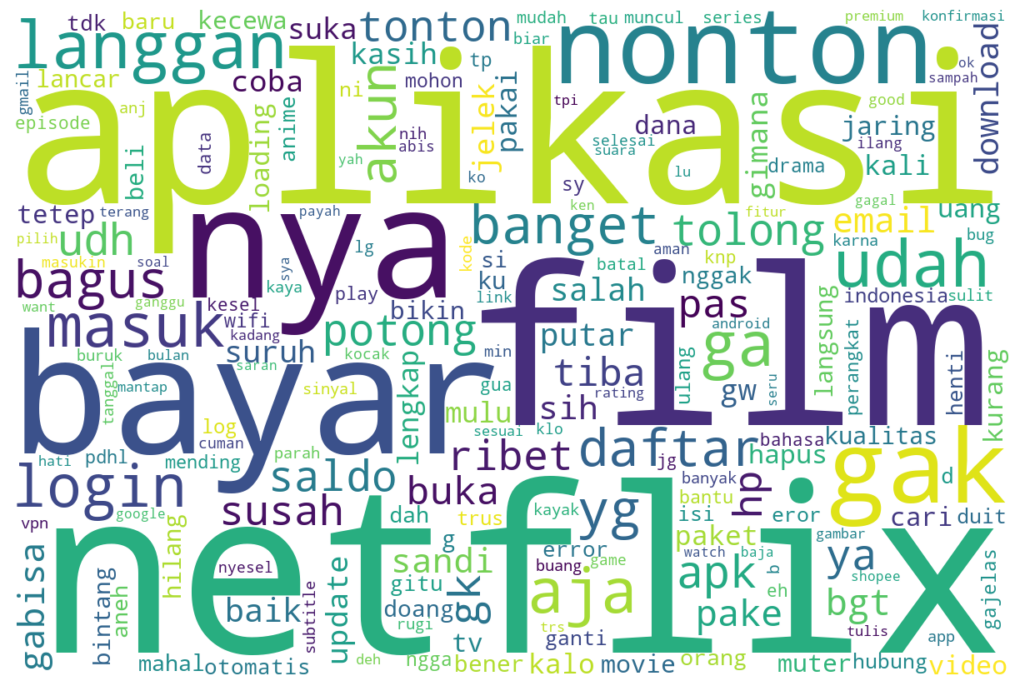

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- 1. Memuat Data Bersih ---
input_filename = 'netflix_playstore_reviews_final.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"✅ File '{input_filename}' berhasil dimuat.")
except FileNotFoundError:
    print(f"❌ File '{input_filename}' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan semua skrip pembersihan data sebelumnya.")
    exit()

# --- 2. Menggabungkan Semua Ulasan Menjadi Satu Teks ---
# WordCloud bekerja pada satu blok teks yang panjang.
# Kita akan menggabungkan semua ulasan di kolom 'normalized_content' menjadi satu string.
# Pastikan tidak ada nilai kosong (NaN) untuk menghindari error.
df.dropna(subset=['normalized_content'], inplace=True)
all_reviews_text = ' '.join(df['normalized_content'])

print("\n🚀 Memulai proses pembuatan WordCloud...")

# --- 3. Membuat Objek WordCloud ---
# Anda bisa menyesuaikan parameter ini sesuai keinginan:
# width & height: Ukuran gambar yang dihasilkan.
# background_color: Warna latar belakang.
# colormap: Skema warna yang digunakan untuk kata-kata. 'viridis', 'plasma', 'inferno', 'magma', 'cividis' adalah pilihan yang bagus.
# min_font_size: Ukuran font terkecil untuk kata yang jarang muncul.
# collocations=False: Mencegah wordcloud menampilkan kata yang sama berulang kali (misal: "tidak bisa" dianggap sebagai satu entitas).
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    colormap='viridis',
    min_font_size=10,
    collocations=False
).generate(all_reviews_text)

print("👍 WordCloud berhasil dibuat.")

# --- 4. Menampilkan WordCloud ---
print("🖼️  Menampilkan gambar WordCloud...")

plt.figure(figsize=(10, 7))  # Mengatur ukuran tampilan plot
plt.imshow(wordcloud, interpolation='bilinear') # Menampilkan gambar
plt.axis("off")  # Menghilangkan sumbu x dan y
plt.tight_layout(pad=0) # Memastikan gambar pas dengan area tampilan
plt.show()

# WordCloud Ulasan Netflix Indonesia

✅ File 'netflix_playstore_reviews_usa_final.csv' loaded successfully.

🚀 Starting the WordCloud generation process...
👍 WordCloud generated successfully.
🖼️  Displaying the WordCloud image...


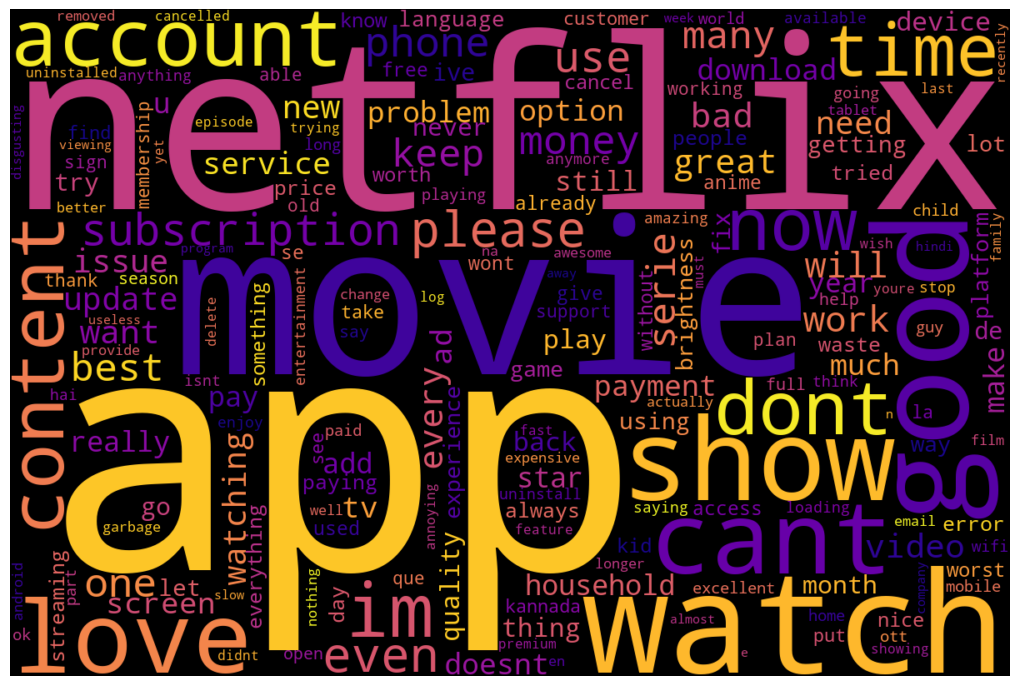

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- 1. Memuat Data Bersih ---
input_filename = 'netflix_playstore_reviews_usa_final.csv'
try:
    df = pd.read_csv(input_filename)
    print(f"✅ File '{input_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"❌ File '{input_filename}' not found.")
    print("Please ensure you have run all previous cleaning scripts for the USA reviews.")
    exit()

# --- 2. Menggabungkan Semua Ulasan Menjadi Satu Teks ---
# WordCloud memerlukan satu blok teks panjang sebagai input.
# Kita gabungkan semua ulasan dari kolom 'normalized_content' menjadi satu string.
# Pastikan tidak ada nilai kosong (NaN) untuk menghindari error.
df.dropna(subset=['normalized_content'], inplace=True)
all_reviews_text = ' '.join(df['normalized_content'])

print("\n🚀 Starting the WordCloud generation process...")

# --- 3. Membuat Objek WordCloud ---
# Anda bisa mengubah parameter ini untuk menyesuaikan tampilan:
# width, height: Ukuran gambar yang dihasilkan.
# background_color: Warna latar belakang.
# colormap: Skema warna untuk kata-kata. 'viridis', 'plasma', 'cividis', 'inferno' adalah pilihan populer.
# collocations=False: Mencegah WordCloud menggabungkan kata-kata umum (misalnya 'new update').
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='black', # Latar belakang hitam seringkali terlihat bagus
    colormap='plasma',
    min_font_size=10,
    collocations=False
).generate(all_reviews_text)

print("👍 WordCloud generated successfully.")

# --- 4. Menampilkan WordCloud ---
print("🖼️  Displaying the WordCloud image...")

# Mengatur ukuran figur matplotlib
plt.figure(figsize=(10, 7))
# Menampilkan gambar yang dihasilkan
plt.imshow(wordcloud, interpolation='bilinear')
# Menghilangkan sumbu (garis x dan y) agar terlihat bersih
plt.axis("off")
# Memastikan layout rapi
plt.tight_layout(pad=0)
# Menampilkan jendela plot
plt.show()